<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/transfer_learning_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input

In [3]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget -nc https://archive.org/download/food-5-k/Food-5K.zip

--2025-01-23 04:54:03--  https://archive.org/download/food-5-k/Food-5K.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601606.us.archive.org/13/items/food-5-k/Food-5K.zip [following]
--2025-01-23 04:54:03--  https://ia601606.us.archive.org/13/items/food-5-k/Food-5K.zip
Resolving ia601606.us.archive.org (ia601606.us.archive.org)... 207.241.227.86
Connecting to ia601606.us.archive.org (ia601606.us.archive.org)|207.241.227.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  56.1MB/s    in 6.1s    

2025-01-23 04:54:10 (70.1 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [5]:
!unzip -qq -o Food-5K.zip

In [6]:
!ls Food-5K/training

0_0.jpg     0_1338.jpg	0_325.jpg  0_663.jpg  1_0.jpg	  1_1338.jpg  1_325.jpg  1_663.jpg
0_1000.jpg  0_1339.jpg	0_326.jpg  0_664.jpg  1_1000.jpg  1_1339.jpg  1_326.jpg  1_664.jpg
0_1001.jpg  0_133.jpg	0_327.jpg  0_665.jpg  1_1001.jpg  1_133.jpg   1_327.jpg  1_665.jpg
0_1002.jpg  0_1340.jpg	0_328.jpg  0_666.jpg  1_1002.jpg  1_1340.jpg  1_328.jpg  1_666.jpg
0_1003.jpg  0_1341.jpg	0_329.jpg  0_667.jpg  1_1003.jpg  1_1341.jpg  1_329.jpg  1_667.jpg
0_1004.jpg  0_1342.jpg	0_32.jpg   0_668.jpg  1_1004.jpg  1_1342.jpg  1_32.jpg	 1_668.jpg
0_1005.jpg  0_1343.jpg	0_330.jpg  0_669.jpg  1_1005.jpg  1_1343.jpg  1_330.jpg  1_669.jpg
0_1006.jpg  0_1344.jpg	0_331.jpg  0_66.jpg   1_1006.jpg  1_1344.jpg  1_331.jpg  1_66.jpg
0_1007.jpg  0_1345.jpg	0_332.jpg  0_670.jpg  1_1007.jpg  1_1345.jpg  1_332.jpg  1_670.jpg
0_1008.jpg  0_1346.jpg	0_333.jpg  0_671.jpg  1_1008.jpg  1_1346.jpg  1_333.jpg  1_671.jpg
0_1009.jpg  0_1347.jpg	0_334.jpg  0_672.jpg  1_1009.jpg  1_1347.jpg  1_334.jpg  1_672.jpg
0_100.jpg   0_1

In [7]:
!mv Food-5K/* .

In [8]:
!ls

evaluation  Food-5K  Food-5K.zip  __MACOSX  sample_data  training  validation


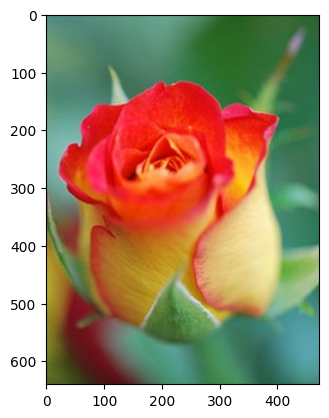

In [9]:
from tensorflow.keras.preprocessing import image
plt.imshow(image.load_img('training/0_808.jpg'))

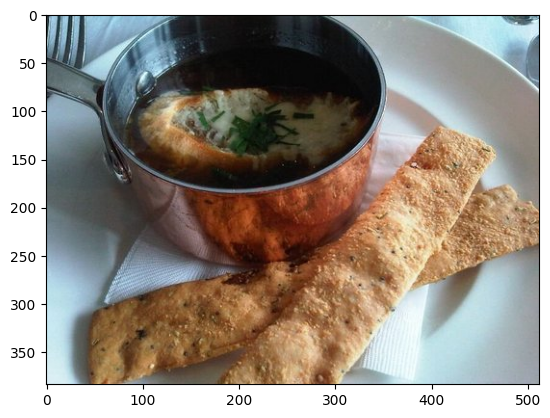

In [10]:
plt.imshow(image.load_img('training/1_0.jpg'))

In [11]:
!mkdir data
!ls

data  evaluation  Food-5K  Food-5K.zip	__MACOSX  sample_data  training  validation


In [12]:
!mkdir data/train
!mkdir data/test

!mkdir data/train/non_food
!mkdir data/train/food
!mkdir data/test/non_food
!mkdir data/test/food

In [13]:
!mv training/0*.jpg data/train/non_food
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/non_food
!mv validation/1*.jpg data/test/food

In [14]:
train_path = 'data/train'
valid_path = 'data/test'

In [15]:
IMAGE_SIZE = [200 , 200]

In [16]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [17]:
folders = glob(train_path + '/*')
folders

['data/train/food', 'data/train/non_food']

In [18]:
K = len(folders)
K

2

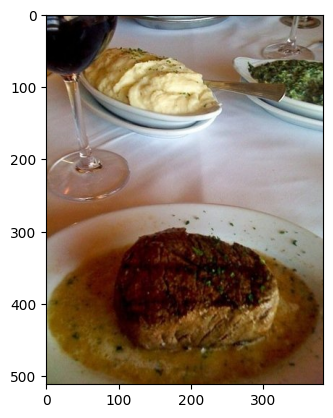

In [19]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [20]:
ptm = PretrainedModel(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top = False
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
ptm.trainable = False

In [22]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
  ]
)

In [23]:
#build modell with functional api

i = tf.keras.layers.Input(shape = IMAGE_SIZE + [3])
x = preprocess_input(i)
x = data_augmentation(x)
x = ptm(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(K,activation='softmax')(x)

model = tf.keras.models.Model(i,x)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 200, 200)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 200, 200, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 200, 200, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 200, 200, 3)    │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 6, 6, 512)      │     14,714,688 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 18432)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2)              │         36,866 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,751,554 (56.27 MB)

 Trainable params: 36,866 (144.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
batch_size = 128
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size = IMAGE_SIZE,
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    image_size = IMAGE_SIZE,
    batch_size = batch_size
)


Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [28]:
r = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8567 - loss: 2.0112 - val_accuracy: 0.9780 - val_loss: 0.4585
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 642ms/step - accuracy: 0.9787 - loss: 0.3116 - val_accuracy: 0.9800 - val_loss: 0.4510
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 664ms/step - accuracy: 0.9826 - loss: 0.2586 - val_accuracy: 0.9790 - val_loss: 0.4814
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 666ms/step - accuracy: 0.9874 - loss: 0.1572 - val_accuracy: 0.9750 - val_loss: 0.5270
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 671ms/step - accuracy: 0.9903 - loss: 0.0996 - val_accuracy: 0.9750 - val_loss: 0.5991
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 687ms/step - accuracy: 0.9925 - loss: 0.0861 - val_accuracy: 0.9740 - val_loss: 0.6802
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 700ms/step - accuracy: 0.9924 - loss: 0.0840 - val_accuracy: 0.9720 - val_loss: 0.7443
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 693ms/step - accuracy: 0.9919 - loss: 0.1169 - val_accurac

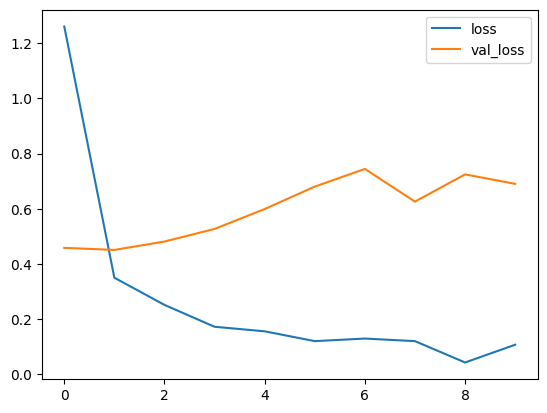

In [29]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

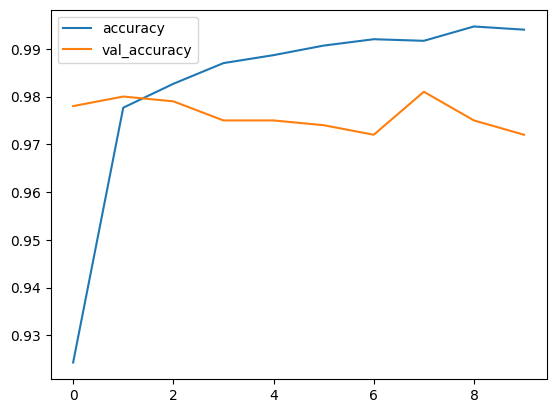

In [30]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()